### What this notebook contains - 
1. Getting a Custom Dataset from pytorch
2. Preparing and Visualizing Data
3. Transforming data for use with model
4. Loading Custom Data with pre-built functions and custom functions
5. Building FoodVision Mini to classify images
6. Comparing Models with and without Data Augmentation
7. Making Predictions on Custom Data

## 0. Importing pytorch and setting device agnostic code

In [7]:
import torch
from torch import nn

In [8]:
torch.__version__

'2.2.2'

In [9]:
# setting up device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

In [10]:
device

'cpu'

### Dataset

1. Subset of foff 101 dataset
2. Our dataset has only 3 classes of food and only 10% of the original dataset images
3. WHEN STARTING ML PROJECTS, ITS IMPORTANT TO REMEMBER TO TRY THINGS ON A SMALLER SCALE AND THEN INCREASE THE SCALE WHEN GETTING RESULTS.
4. UNDERSTAND THAT WHEN YOU ARE EXPERIMENTING ITS GOOD TO DO EXPERIMENTS ON SMALLER DATASETS

## 1. Importing Datasets from External Sources

In [12]:
import requests
import zipfile
from pathlib import Path

## Creating the Path and Making the Directory to save the downloaded File

# 1. Setup your path where you want to save the downloaded file
data_path = Path("/Users/venu/Documents/Productivity/Pytorch Tutorials/data")
#2. Create the folder where you want to save the downloaded file
image_path = data_path / "pizza_steak_sushi"

#3. Creating the actual folder
if image_path.is_dir(): # if the path already exists
    print(f"{image_path} already exists skipping download")
else:
    print(f"{image_path} does not exist. Creating One")
    image_path.mkdir(parents = True, exist_ok=True)


## Downloading the Data from Github sources

#1. Open the created file in write mode
with open(image_path / "pizza_steak_sushi.zip", "wb") as f: # create the file name and file type to which you want to write the downloaded file
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip") # we request to get data from the provided link
    print("Downloading the Pizza Steak Sushi data from the provided source -----")
    f.write(request.content) ## we write the downloaded content to the file which is open in write binary mode


## Unzipping the downloaded data

# 1. The path to file which we want to unzip and opening it in read mode
with zipfile.ZipFile(image_path / "pizza_steak_sushi.zip", "r") as zip_file:
    print("Unzipping the selected zip file ----")
    zip_file.extractall(image_path) # we extract the selected zip file to the path where we want to extract

/Users/venu/Documents/Productivity/Pytorch Tutorials/data/pizza_steak_sushi already exists skipping download
Unzipping the selected zip file ----


### 2. Data Preperation and Data exploration

In [13]:
import os

In [14]:
def walk_through_dir(dir_path):
    """Walk through directory path returning its contents."""
    for dir_path, dir_names, filenames in os.walk(dir_path):
        print(f"There are {len(dir_names)} directories and {len(filenames)} images in {dir_path}")

In [15]:
walk_through_dir(image_path)

There are 5 directories and 2 images in /Users/venu/Documents/Productivity/Pytorch Tutorials/data/pizza_steak_sushi
There are 3 directories and 1 images in /Users/venu/Documents/Productivity/Pytorch Tutorials/data/pizza_steak_sushi/test
There are 0 directories and 19 images in /Users/venu/Documents/Productivity/Pytorch Tutorials/data/pizza_steak_sushi/test/steak
There are 0 directories and 31 images in /Users/venu/Documents/Productivity/Pytorch Tutorials/data/pizza_steak_sushi/test/sushi
There are 0 directories and 25 images in /Users/venu/Documents/Productivity/Pytorch Tutorials/data/pizza_steak_sushi/test/pizza
There are 0 directories and 17 images in /Users/venu/Documents/Productivity/Pytorch Tutorials/data/pizza_steak_sushi/VENU
There are 3 directories and 0 images in /Users/venu/Documents/Productivity/Pytorch Tutorials/data/pizza_steak_sushi/train
There are 0 directories and 75 images in /Users/venu/Documents/Productivity/Pytorch Tutorials/data/pizza_steak_sushi/train/steak
There 

In [16]:
# Setup training and test paths
training_path = image_path / "train"
testing_path = image_path / "test"

In [17]:
training_path, testing_path

(PosixPath('/Users/venu/Documents/Productivity/Pytorch Tutorials/data/pizza_steak_sushi/train'),
 PosixPath('/Users/venu/Documents/Productivity/Pytorch Tutorials/data/pizza_steak_sushi/test'))

## 2.1 Visualize a Random Image

1. Get all of the Image Paths
2. Pick a Random Image Path using `random.choice()`
3. Acquire the Image class names using `pathlib.Path.parent.stem`
4. We can open an image using Python's PIL library (Python's Image Library)
5. Viusalize an Image and print the metadata of that image.

In [18]:
image_path

PosixPath('/Users/venu/Documents/Productivity/Pytorch Tutorials/data/pizza_steak_sushi')

In [19]:
import random
from PIL import Image

In [44]:
#random.seed(95)

# Get all image paths as a list
image_path_list = list(image_path.glob("*/*/*.jpg"))
#  The code image_path.glob("*/*/*.jpg") is using the glob method from the pathlib module in 
# Python to find all JPEG files within a directory tree.

In [45]:
#image_path_list

In [60]:
# now from the above list we can pick a random image from the list
random_image_path = random.choice(image_path_list)

# Getting the image class name from the path name stem (the class name will be the directory name of the images where they are saved)
image_class = random_image_path.parent.stem
print(image_class)

pizza


Random Image Path : /Users/venu/Documents/Productivity/Pytorch Tutorials/data/pizza_steak_sushi/test/pizza/1925494.jpg
Random Image Class: pizza
Image Height: 512
Image Width: 512


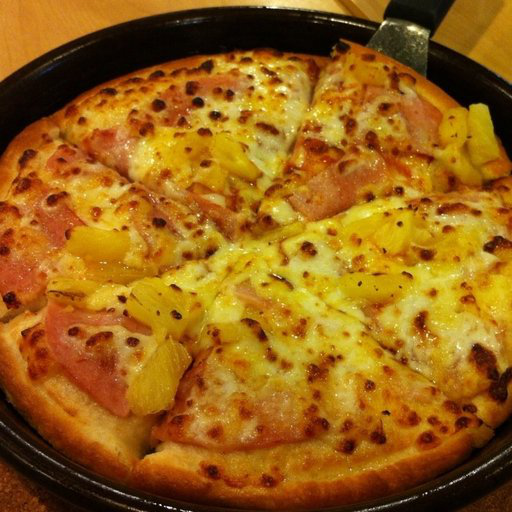

In [61]:
# Open and Visualize the Image
img = Image.open(random_image_path)

print(f"Random Image Path : {random_image_path}")
print(f"Random Image Class: {image_class}")
print(f"Image Height: {img.height}")
print(f"Image Width: {img.width}")
img

### Visualizing the Image using matplotlib

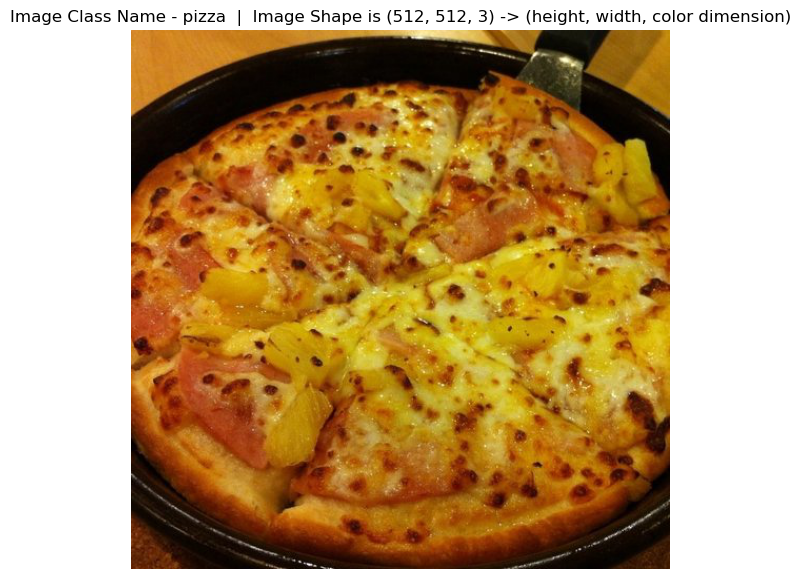

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.array(img)

# plot the image using matplotlib
plt.figure(figsize = (10,7))
plt.imshow(img_as_array)
plt.title(f"Image Class Name - {image_class}  |  Image Shape is {img_as_array.shape} -> (height, width, color dimension)")
plt.axis(False);

In [66]:
img_as_array

array([[[221, 141,  52],
        [217, 137,  48],
        [214, 135,  43],
        ...,
        [191, 138,  10],
        [189, 136,   6],
        [194, 141,   9]],

       [[211, 131,  42],
        [215, 136,  44],
        [216, 137,  45],
        ...,
        [193, 140,  12],
        [191, 138,   8],
        [196, 143,  11]],

       [[204, 124,  35],
        [213, 134,  42],
        [216, 137,  45],
        ...,
        [194, 139,  12],
        [191, 138,   8],
        [195, 142,  10]],

       ...,

       [[101,  38,   5],
        [ 95,  32,   0],
        [100,  37,   4],
        ...,
        [ 64,  27,   0],
        [ 62,  25,   0],
        [ 65,  26,   0]],

       [[102,  37,   5],
        [ 95,  30,   0],
        [ 96,  31,   0],
        ...,
        [ 62,  25,   0],
        [ 62,  25,   0],
        [ 66,  27,   0]],

       [[ 89,  25,   0],
        [ 94,  30,   0],
        [105,  41,   6],
        ...,
        [ 59,  22,   0],
        [ 65,  28,   1],
        [ 73,  34,   5]]

## 3. Transforming Data into Tensor format

Before we use our image data with pytorch - 

1. Turn our data into Tensor format (Image Array data into Tensor format)
2. Turn it into a `torch.utils.data.Dataset` -> this converts the data into Pytorch dataset format and `torch.utils.data.DataLoader` this converts the dataset into Python iterable format. Basically into batches.

### Transforms in Torchvision

In Torchvision, transforms is a module that provides a way to preprocess and transform data, particularly images, before feeding them into a neural network.
Transforms are a series of operations that can be applied to an image to modify its appearance, such as resizing, cropping, flipping, normalizing, and more. These operations can be chained together to create a pipeline of transformations that are applied to the image data.
The transforms module in Torchvision provides a variety of built-in transformations that can be used to preprocess images, including:
Resize: Resizes an image to a specified size.
CenterCrop: Crops an image to a specified size, centered around the middle of the image.
RandomCrop: Crops an image to a specified size, with the crop location chosen randomly.
RandomHorizontalFlip: Flips an image horizontally with a specified probability.
RandomVerticalFlip: Flips an image vertically with a specified probability.
ToTensor: Converts an image to a PyTorch tensor.
Normalize: Normalizes an image by subtracting the mean and dividing by the standard deviation.

### torch.utils.data.Dataset


In PyTorch, torch.utils.data.Dataset is a base class that represents a dataset, which is a collection of data samples. A dataset can be thought of as a container that holds the data and provides a way to access and manipulate it.
A Dataset object is responsible for:
Storing the data: A dataset stores the actual data, which can be images, text, audio, or any other type of data.
Providing data access: A dataset provides a way to access the data, such as indexing, slicing, and iterating over the data.
Defining data transformations: A dataset can define transformations that are applied to the data, such as data augmentation, normalization, or feature extraction.
By creating a custom Dataset class, you can:
Load and preprocess data: Load data from various sources, such as files, databases, or web APIs, and preprocess it as needed.
Define custom data structures: Define custom data structures to represent the data, such as tensors, arrays, or objects.
Implement data transformations: Implement custom data transformations, such as data augmentation, feature extraction, or normalization.

### torch.utils.data.DataLoader


In PyTorch, torch.utils.data.DataLoader is a class that provides a way to batch and iterate over a dataset in a flexible and efficient manner.
A DataLoader object is responsible for:
Batching the data: A DataLoader batches the data into mini-batches, which are used to train or evaluate a model.
Shuffling the data: A DataLoader shuffles the data to randomize the order of the samples.
Providing data iterators: A DataLoader provides iterators over the data, which can be used to access the data in a loop.

Batching: DataLoader allows you to specify the batch size, which determines how many samples are processed together as a single unit.
Shuffling: DataLoader can shuffle the data to randomize the order of the samples, which helps to prevent overfitting.
Iterators: DataLoader provides iterators over the data, which can be used to access the data in a loop.
Multi-threading: DataLoader can use multiple threads to load data in parallel, which can improve performance.

In [67]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### 3.1 Transforming data with torchvision.transforms

1. We can combine a few tranforms together using tranforms.Compose or also nn.Sequential

In [78]:
# Write a transform for a single image

data_transform = transforms.Compose([ # it takes list as an input
    # Resize our images into 64 * 64 as already have a train model with those hyper params
    transforms.Resize(size = (64, 64)),
    # Flip the image randomly on the horizon for data augmentation, p is a probability hyperparamter.
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into a torch.tensor() format
    transforms.ToTensor() # please read the doc string
])

In [79]:
img_as_array

array([[[221, 141,  52],
        [217, 137,  48],
        [214, 135,  43],
        ...,
        [191, 138,  10],
        [189, 136,   6],
        [194, 141,   9]],

       [[211, 131,  42],
        [215, 136,  44],
        [216, 137,  45],
        ...,
        [193, 140,  12],
        [191, 138,   8],
        [196, 143,  11]],

       [[204, 124,  35],
        [213, 134,  42],
        [216, 137,  45],
        ...,
        [194, 139,  12],
        [191, 138,   8],
        [195, 142,  10]],

       ...,

       [[101,  38,   5],
        [ 95,  32,   0],
        [100,  37,   4],
        ...,
        [ 64,  27,   0],
        [ 62,  25,   0],
        [ 65,  26,   0]],

       [[102,  37,   5],
        [ 95,  30,   0],
        [ 96,  31,   0],
        ...,
        [ 62,  25,   0],
        [ 62,  25,   0],
        [ 66,  27,   0]],

       [[ 89,  25,   0],
        [ 94,  30,   0],
        [105,  41,   6],
        ...,
        [ 59,  22,   0],
        [ 65,  28,   1],
        [ 73,  34,   5]]

In [81]:
data_transform(img).shape, data_transform(img)

(torch.Size([3, 64, 64]),
 tensor([[[0.8353, 0.8353, 0.8157,  ..., 0.5922, 0.6157, 0.7333],
          [0.8353, 0.8353, 0.8118,  ..., 0.5922, 0.6745, 0.7529],
          [0.8431, 0.8431, 0.8235,  ..., 0.6314, 0.7333, 0.7529],
          ...,
          [0.4078, 0.3882, 0.3843,  ..., 0.1451, 0.2118, 0.2235],
          [0.3725, 0.3765, 0.4000,  ..., 0.2431, 0.2275, 0.2392],
          [0.3882, 0.3804, 0.3765,  ..., 0.2549, 0.2353, 0.2510]],
 
         [[0.5373, 0.5333, 0.5137,  ..., 0.4000, 0.4157, 0.5137],
          [0.5451, 0.5294, 0.5098,  ..., 0.4039, 0.4549, 0.5255],
          [0.5569, 0.5412, 0.5137,  ..., 0.4275, 0.5020, 0.5137],
          ...,
          [0.1725, 0.1529, 0.1490,  ..., 0.0667, 0.0980, 0.0980],
          [0.1490, 0.1529, 0.1608,  ..., 0.1098, 0.1020, 0.1098],
          [0.1529, 0.1451, 0.1490,  ..., 0.1137, 0.1020, 0.1137]],
 
         [[0.1608, 0.1608, 0.1412,  ..., 0.0549, 0.0471, 0.0549],
          [0.1647, 0.1647, 0.1412,  ..., 0.0549, 0.0549, 0.0549],
          [0.1

In [82]:
# we can visualize the original images and the transformed images and compare them using a visualization function

In [88]:
def plot_transformed_images(image_paths: list, transform, samples = 3, seed = None):
    """ This function selects random sample images from the original image path and loads/transforms them.
    And then plots the original vs transformed version of the images"""
    if seed:
        random.seed(seed)
        random_image_paths = random.sample(image_paths, k = samples)
        for image_path in random_image_paths: # its just an image path, we need to open the image
            with Image.open(image_path) as f:
                #plotting the default image
                fig, ax = plt.subplots(nrows = 1, ncols = 2)
                ax[0].imshow(f)
                ax[0].set_title(f"Original Shape \nSize:{f.size}")
                ax[0].axis(False) # The Original Image is in the shape of (H, W, B), matplotlib accepts only(B,H,W)

                #plotting the transformed image
                transformed_image = transform(f)
                ax[1].imshow(transformed_image)
                ax[1].set_title(f"Transformed Image \nSize:{transformed_image.shape}")
                ax[1].axis(False)

                fig.suptitle(f"Class: {image_path.parent.stem}", fontsize = 16)
            

TypeError: Invalid shape (3, 64, 64) for image data

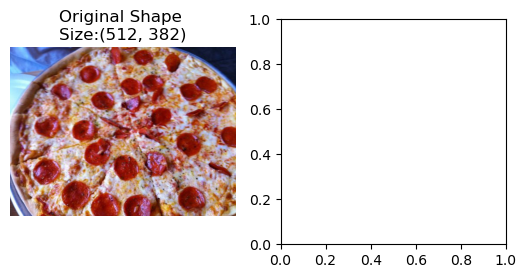

In [89]:
plot_transformed_images(image_paths = image_path_list,
                       transform = data_transform,
                       samples = 3,
                       seed = 95)

#### The Original Image is in the shape of (H, W, B), matplotlib accepts only(B,H,W)

In [94]:
def plot_transformed_images(image_paths: list, transform, samples = 3, seed = None):
    """ This function selects random sample images from the original image path and loads/transforms them.
    And then plots the original vs transformed version of the images"""
    if seed:
        random.seed(seed)
        random_image_paths = random.sample(image_paths, k = samples)
        for image_path in random_image_paths: # its just an image path, we need to open the image
            with Image.open(image_path) as f:
                #plotting the default image
                fig, ax = plt.subplots(nrows = 1, ncols = 2)
                ax[0].imshow(f)
                ax[0].set_title(f"Original Shape \nSize:{f.size}")
                ax[0].axis(False) # The Original Image is in the shape of (C,H,W) matplotlib accepts only(H,W,C)

                #plotting the transformed image
                transformed_image = transform(f).permute(1,2,0)
                ax[1].imshow(transformed_image)
                ax[1].set_title(f"Transformed Image \nSize:{transformed_image.shape}")
                ax[1].axis(False)

                fig.suptitle(f"Class: {image_path.parent.stem}", fontsize = 16)

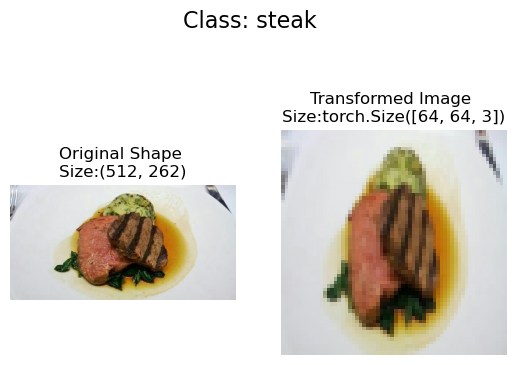

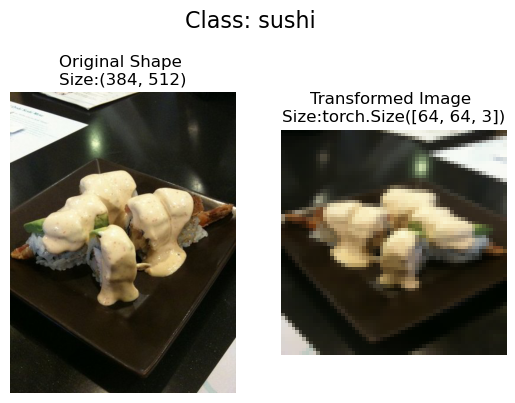

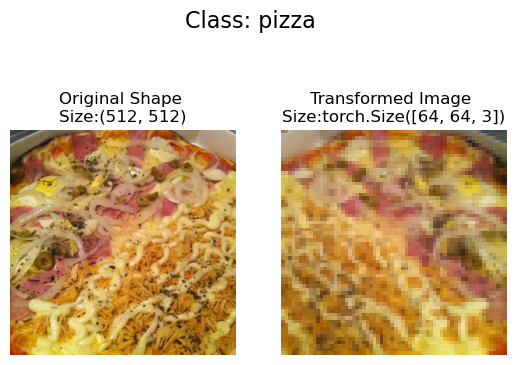

In [96]:
plot_transformed_images(image_paths = image_path_list,
                       transform = data_transform,
                       samples = 3,
                       seed = 5)

### 4.Loading Image data using ImageFolder

In [98]:
# Using ImageFolder Class to create datasets
from torchvision import datasets

train_data = datasets.ImageFolder(root = training_path, # we have already created root path for our training and testing data
                                 transform = data_transform,
                                 target_transform= None)# transform for the label, 
# Our labels are going to be created by the target directory where the images exist, 
# Example -  the pizza images are in pizza directory and they are going to have pizza as their label name.
# THIS IS BECAUSE OUR DATASET IS IN IMAGE CLASSIFICATION AS PER IMAGE FOLDER GENERIC FORMAT

test_data = datasets.ImageFolder(root = testing_path,
                                transform = data_transform)
 

Behind the scene, the images are going to the steps which we just did using data_transform and plot_transformed_images loop

In [100]:
train_data.classes

['pizza', 'steak', 'sushi']

In [101]:
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: /Users/venu/Documents/Productivity/Pytorch Tutorials/data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: /Users/venu/Documents/Productivity/Pytorch Tutorials/data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [102]:
train_data.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [103]:
# len of datasets
len(train_data), len(test_data)

(225, 75)

In [104]:
train_data[0]

(tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
          [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
          [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
          ...,
          [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
          [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0863],
          [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],
 
         [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
          [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0706],
          [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
          ...,
          [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
          [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
          [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],
 
         [[0.0196, 0.0196, 0.0196,  ..., 0.0902, 0.0902, 0.0941],
          [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
          [0.0196, 0.0157, 0.0157,  ...,

## 4. Creating a Custom DataLoading Class to load custom Image Dataset

Functionalities - 
1. Want to load images from files
2. Want to get class names from the Dataset
3. Want to get classes as Dictionary format from the Dataset

The base dataset class is `torch.utils.data.Dataset`. We will build on top of this.

Pros - 
1. Can Create a `dataset` of anything.
2. Not limited to Pytorch pre-build `Dataset` Functions.

Cons - 
1. Although we create custom `datasets`, sometimes they may or may not work.
2. Involves more coding.

1. almost all the Custom functions subclass `torch.utils.data.Dataset`
2. All subclasses should overwrite `__getitem__()` -> supports fetching a data sample for a given key
3. Optionally overwrite __len__() which is expected tp return the size of the dataset. 

In [106]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, List, Dict

In [107]:
# we want to replicate this functionality to our custom dataset
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [108]:
# We can create a helper function to replicate this functionality
# What we want to replicate this, when we pass the directory path to our function it replicates this functionality

## 5.1 Creating a Helper Function to get class names

We want our helper function to - 
1. Get the class names using `os.scandir()` to go through a target directory.(The directory should be in standard format of Image Classification)
2. Raise an error if the class names are'nt found (It means that, there might be something wrong with the directory structure)
3. Turn the class names into a list, dict and return them.

In [109]:
## Trying the functionality which we want to implement

# Setup path for target directory
target_directory = testing_path
print(f"Target Directory: {target_directory}")

Target Directory: /Users/venu/Documents/Productivity/Pytorch Tutorials/data/pizza_steak_sushi/test


In [114]:
# Get the class names using os.scandir() from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(testing_path)) if not entry.name.startswith(".")])

In [127]:
class_names_found # Turning this into a function

['pizza', 'steak', 'sushi']

In [128]:
list(os.scandir(testing_path))

[<DirEntry '.DS_Store'>,
 <DirEntry 'steak'>,
 <DirEntry 'sushi'>,
 <DirEntry 'pizza'>]

In [139]:
# Reciprocating the above functionality using function

def find_classes(directory: str):
    """ Find the class folder names with the given directory"""

    #1. Finds the class folder names in a given directory
    class_names = sorted([entry.name for entry in list(os.scandir(directory)) if not entry.name.startswith(".")])

    # Raise an error if class names could not be found
    if not class_names:
        raise FileNotFoundError(f"Could not find any classes in {directory}.. Please recheck the file structure\n")

    #2. From the class names convert and store them into a dictionary format
    class_names_dict = {class_name: i for i, class_name in enumerate(class_names)}
    
    return class_names, class_names_dict

In [140]:
find_classes(testing_path)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

All datasets that represent a map from TARGETS to INPUTS should subclass it. All subclasses should overwrite __getitem__(), supporting fetching a data sample for a given TARGET. Subclasses could also optionally overwrite __len__(), which is expected to return the size of the dataset by many Sampler implementations and the default options of DataLoader

### 5.2 Create a Custom `Dataset` class to replicate `ImageFolder`
The attributes might defer depending on the dataset, however we are representing the ImageFolder so we want to mimic its functionality. 
To create our own custom dataset, we want to ---

1. Subclass `torch.utils.data.Dataset`
2. Initialize our subclass with a target directory (The directory we would like to get the data from) as well as transform we would like to transform our data.
3. Create several attributes -
   * paths - Paths of our Images
   * transform - the transform we would like to use for our input images
   * classes - a list of the target classes
   * class_to_idx - a dict of the target classes mapped to their integer labels
4. Create a function to `load_images()`, this function will open an image
5. Overwrite the `__len()__` which will provide the length of the dataset.
6. Overwrite the `__getitem()__` method which returns a corresponding sample when passed an index

In [214]:
# 0. Import custom Dataset class
from torch.utils.data import Dataset

# 1. Subclass torch.utils.data.Dataset
class CustomImageFolder(Dataset):
    # 2. Initialize our custom dataset
    def __init__(self,
                target_dir: str, # We can pass in the target directory of images we can load
                transform = None):# We can pass in the transform object through which we can modify our images

        # 3. Create class attributes
        
        # This gets all of the image paths - # Get all image paths as a list 
        # image_path_list = list(image_path.glob("*/*/*.jpg"))
        # PosixPath('/Users/venu/Documents/Productivity/Pytorch Tutorials/data/pizza_steak_sushi/train')
        # Acquire the Image class names using `pathlib.Path.parent.stem`
        self.paths = list(pathlib.Path(target_dir).glob("*/*.jpg"))

        # Setup Transform
        # In Torchvision, transforms is a module that provides a way to preprocess and transform data, 
        # particularly images, before feeding them into a neural network. Transforms are a series of operations 
        # that can be applied to an image to modify its appearance, such as resizing, cropping, flipping, normalizing, and more.
        self.transform = transform

        # Setup classes and class to idx
        self.classes, self.class_to_idx = find_classes(target_dir)

        # 4. Create a function to Load Images
    def load_image(self, index: int) -> Image.Image: # Index of the image we would like to load
        
        # Image comes from -> from PIL import Image
        # adds image processing capabilities 
        """Opens an Image via a path and return the image. We get a particular image path and we open it"""
        image_path = self.paths[index]
        return Image.open(image_path)
            
            

    # 5. Overwrite the __len__() method
    def __len__(self) -> int:
        """Returns how many samples we have in our dataset"""
        return len(self.paths)

    # 6. Overwrite the __getitem__() method
    # When we pass an index, this returns that particular sample
    # get item is replicating the below - 
    # img, label = train_data[0]
    # img, label

        
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        """Returns one sample of data- data and label (X,y)"""
        img = self.load_image(index)
        class_name = self.paths[index].parent.name # This expects the directory to be in format - data_folder/class_name/image.jpg
        class_idx = self.class_to_idx[class_name]

    # transform if necessary
        if self.transform:
            return self.transform(img), class_idx #return transformed -> img,class_idx
        else:
            return img, class_idx
            
            

In [215]:
training_path

PosixPath('/Users/venu/Documents/Productivity/Pytorch Tutorials/data/pizza_steak_sushi/train')

In [216]:
img, label = train_data[0]
img, label

(tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
          [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
          [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
          ...,
          [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
          [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0863],
          [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],
 
         [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
          [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0706],
          [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
          ...,
          [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
          [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
          [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],
 
         [[0.0196, 0.0196, 0.0196,  ..., 0.0902, 0.0902, 0.0941],
          [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
          [0.0196, 0.0157, 0.0157,  ...,

In [217]:
# Creating a transform
from torchvision import transforms
train_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p = 0.5),
    # our image is going to be in PIL format, we are going to transform it into torch tensor format 
    # return Image.open(image_path)
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [218]:
# Test our Custom Image Folder 
train_data_custom = CustomImageFolder(target_dir= training_path,
                                     transform=train_transform)

test_data_custom = CustomImageFolder(target_dir = testing_path,
                                    transform = test_transform)

In [219]:
train_data_custom, test_data_custom

(<__main__.CustomImageFolder at 0x162e77010>,
 <__main__.CustomImageFolder at 0x162e77810>)

In [220]:
len(train_data), len(train_data_custom)

(225, 225)

In [221]:
len(test_data), len(test_data_custom)

(75, 75)

In [222]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [223]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [224]:
test_data_custom.class_to_idx == test_data.class_to_idx

True

### 5.3 Create a function to display random images

1. Take in a `Dataset` and other params like class_names and how many images to visualize
2. To prevent the images getting extensive we can cap the number of images to see only 10 images.
3. Set the random see for reproductability
4. Get a list of random sample indexes from the target dataset for visualizing those index images
5. Setup matplotlib plot
6. Loop through the random sample images and plot them with matplotlib
7. We have to check the dimension of images when passing through matplot lib as it only accepts in shape(H, W, C)

In [237]:
# 1.Create a function to take in a color channel
def display_random_images(dataset: torch.utils.data.Dataset,
                         classes: List[str] = None,
                         n:int = 10,
                         display_shape: bool = True,
                         seed: int = None):

    # 2. Adjust display if n size is greater than 10
    if n > 10:
        print(f"Reducing the number of images to 10 for visibility reasons and also turning of display shape....")
        n = 10
        display_shape = False

    # 3. Set the seed
    if seed:
        random.seed(seed)

    # 4. Get Random Sample Index
    random_sample_index = random.sample(range(len(dataset)), k = 10)

    #5. Setup plot
    plt.figure(figsize = (20,6))

    #6. Extract the target_image_tensor and target_image_label using random_sample_index
    for i, target_sample in enumerate(random_sample_index):
        target_image, target_label = dataset[target_sample][0], dataset[target_sample][1]

        # The tensor dimension accepted my matplotlib should be in (H,W,C)
        target_image_adj_dimension = target_image.permute(1,2,0)

        plt.subplot(1, n, i+1)
        #1 row for n images and to keep the track of images we do i+1
        plt.imshow(target_image_adj_dimension)
        plt.axis(False)
        if classes:
            title = f"Class : {classes[target_label]}"
            if display_shape:
                title = title + f"\n {target_image_adj_dimension.shape}"
        plt.title(title)

In [238]:
# random_sample_index = random.sample(range(len(train_data_custom)), k =6)
# random_sample_index

In [239]:
# for i, target_sample in enumerate(random_sample_index):
#     print(i)
#     print(target_sample)
#     target_img, target_label = train_data[target_sample]
#     print(train_data[target_sample])
#     print(target_img)
#     print(target_label)

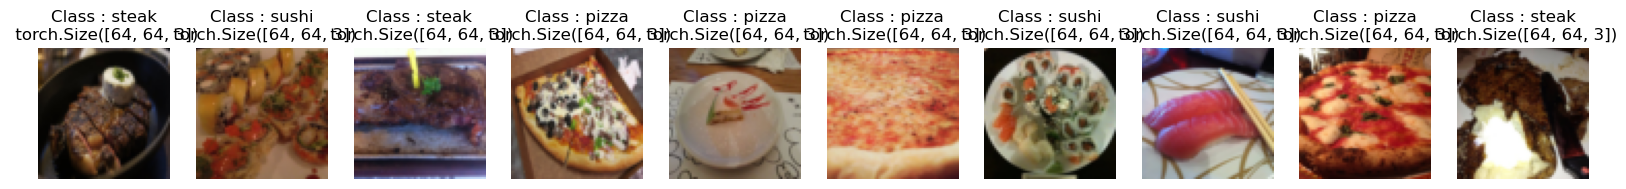

In [240]:
# Displaying images from Pytorch ImageFolder created images
display_random_images(dataset= train_data,
                     classes= class_names_found,
                     n = 10,
                     display_shape= True,
                     seed = 9)

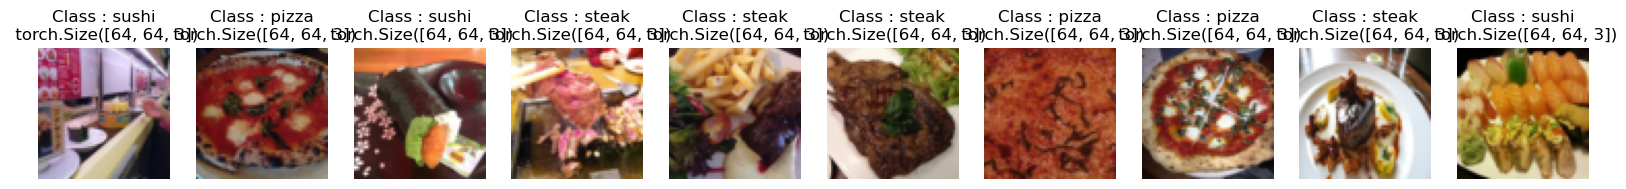

In [241]:
# Displaying images from Custom Created ImageFolder dataset
display_random_images(dataset= train_data_custom,
                     classes= class_names_found,
                     n = 10,
                     display_shape= True,
                     seed = 9)

In [244]:
os.cpu_count()

8

In [254]:
torch.get_num_threads()

4

### 5.4 Turn Custom loaded Images Dataset into DataLoader's

In [263]:
from torch.utils.data import DataLoader

In [264]:
BATCH_SIZE = 32

In [268]:
train_dataloader_custom = DataLoader(dataset = train_data_custom,
                                    batch_size= BATCH_SIZE,
                                    num_workers = 0,
                                    shuffle = True)

test_dataloader_custom = DataLoader(dataset= test_data_custom,
                                   batch_size= BATCH_SIZE,
                                   num_workers= 1)

In [269]:
train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x163754150>,
 <torch.utils.data.dataloader.DataLoader at 0x163755690>)

In [271]:
image_custom, label_custom = next(iter(train_dataloader_custom))

In [274]:
image_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

### 6. Other forms of Data Transformation Techniques
##### https://pytorch.org/vision/main/generated/torchvision.transforms.TrivialAugmentWide.html

In [275]:
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize(size = (224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins= 31),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size = (224, 224)),
    transforms.ToTensor()
])

In [276]:
image_path

PosixPath('/Users/venu/Documents/Productivity/Pytorch Tutorials/data/pizza_steak_sushi')

In [277]:
image_path_list[:5]

[PosixPath('/Users/venu/Documents/Productivity/Pytorch Tutorials/data/pizza_steak_sushi/test/steak/296375.jpg'),
 PosixPath('/Users/venu/Documents/Productivity/Pytorch Tutorials/data/pizza_steak_sushi/test/steak/673127.jpg'),
 PosixPath('/Users/venu/Documents/Productivity/Pytorch Tutorials/data/pizza_steak_sushi/test/steak/894825.jpg'),
 PosixPath('/Users/venu/Documents/Productivity/Pytorch Tutorials/data/pizza_steak_sushi/test/steak/1868005.jpg'),
 PosixPath('/Users/venu/Documents/Productivity/Pytorch Tutorials/data/pizza_steak_sushi/test/steak/27415.jpg')]

### Plot Transformed Images against Original Images

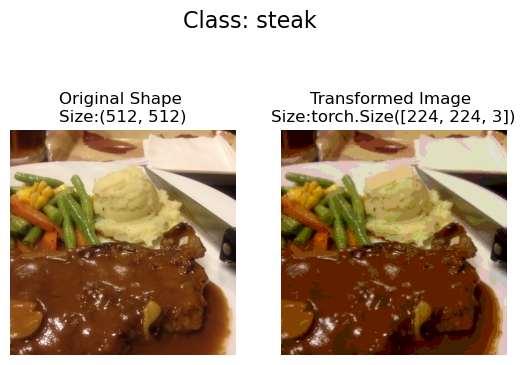

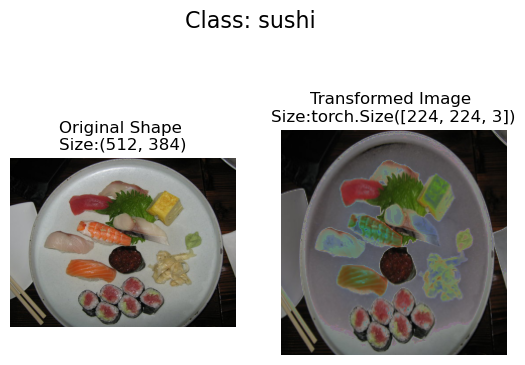

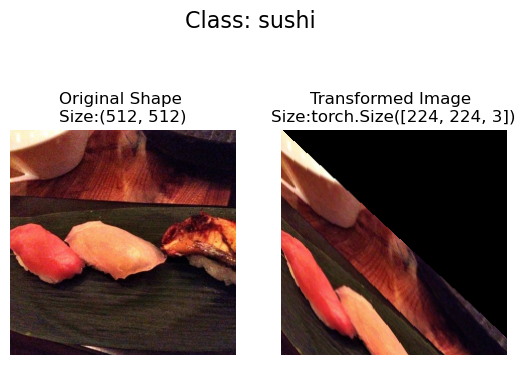

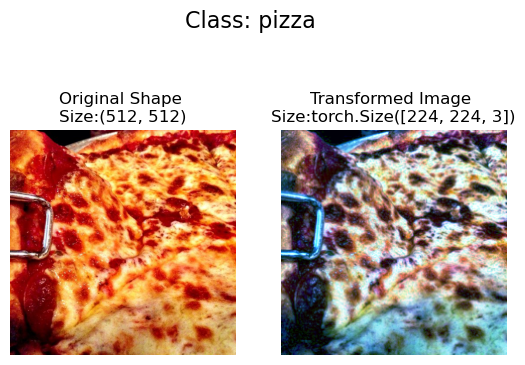

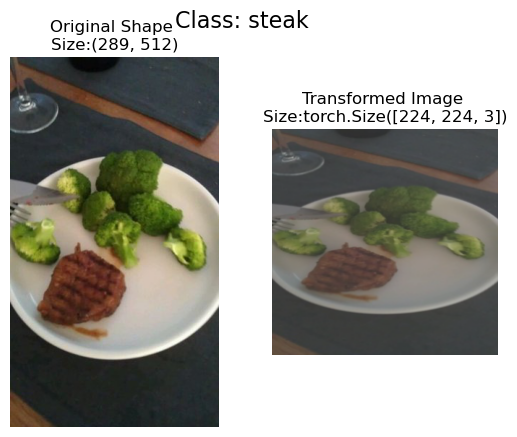

In [281]:
plot_transformed_images(image_paths= image_path_list,seed=8,samples=5,transform = train_transform)

### 7. Model 0. Replicating TinyVGG without data augmentation sample dataset

In [295]:
# creating simple transform
simple_data_transform = transforms.Compose([
    transforms.Resize(size = (64, 64)),
    transforms.ToTensor()
])

In [296]:
# Loading and transform data
from torchvision import datasets

train_data_simple = datasets.ImageFolder(root = training_path,
                                        transform=simple_data_transform)

test_data_simple = datasets.ImageFolder(root = testing_path,
                                       transform= simple_data_transform)

In [297]:
train_data_simple, test_data_simple

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: /Users/venu/Documents/Productivity/Pytorch Tutorials/data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: /Users/venu/Documents/Productivity/Pytorch Tutorials/data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [298]:
# Turn the dataset into dataloader
from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader_simple = DataLoader(dataset= train_data_simple,
                                    batch_size= BATCH_SIZE,
                                    num_workers= NUM_WORKERS,
                                    shuffle = True)

test_dataloader_simple = DataLoader(dataset = test_data_simple,
                                   batch_size= BATCH_SIZE,
                                   num_workers=NUM_WORKERS)

In [299]:
simple_image, label = next(iter(train_data_simple))

In [302]:
simple_image, label

(tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
          [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
          [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
          ...,
          [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
          [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0863],
          [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],
 
         [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
          [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0706],
          [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
          ...,
          [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
          [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
          [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],
 
         [[0.0196, 0.0196, 0.0196,  ..., 0.0902, 0.0902, 0.0941],
          [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
          [0.0196, 0.0157, 0.0157,  ...,

## Create TinyVGG Architecture model class

In [318]:
class TinyVGG(nn.Module):
    def __init__(self,
                input_shape: int,
                hidden_units: int,
                output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels= input_shape,
                     out_channels= hidden_units,
                     kernel_size= 3,
                     padding=1,
                     stride = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                     out_channels= hidden_units,
                     kernel_size = 3,
                     padding = 1,
                     stride = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                        stride = 2)
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels= hidden_units,
                     out_channels= hidden_units,
                     kernel_size= 3,
                     padding=1,
                     stride = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                     out_channels= hidden_units,
                     kernel_size = 3,
                     padding = 1,
                     stride = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                        stride = 2)
        )
        # We need to add a linear layer which is going to have output = num of classes we are working with
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(
                in_features=2560,
                out_features=output_shape
            )
        ) 

    def forward(self, x):
        # return self.classifier(self.conv_block_2(self.conv_block_1(x)))
        x = self.conv_block_1(x)
        #print(x.shape)
        x = self.conv_block_2(x)
        #print(x.shape)
        x = self.classifier(x)
        #print(x.shape)
        return x

In [319]:
torch.manual_seed(95)
model_0 = TinyVGG(input_shape= 3, # number of color channels
                 hidden_units=10,
                 output_shape=len(class_names_found)).to(device)

In [320]:
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

#### Try a forward pass on the model with a single image(to test the model and also we can know the exact input size at classifier stage)

In [309]:
image_batch, image_label = next(iter(train_dataloader_simple))

In [311]:
image_batch.shape, image_label.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [312]:
# Trying the forwrad pass with the single image batch
model_0(image_batch)

torch.Size([32, 10, 32, 32])
torch.Size([32, 10, 16, 16])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x2560 and 10x3)

In [313]:
# RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x2560 and 10x3) ->16*16*10
# here we can see that 32x2560, 2560 is the shape which need to be mentioned at the input shape at the classifier input

In [321]:
model_0(image_batch)

tensor([[ 0.0138, -0.0075,  0.0418],
        [ 0.0142, -0.0061,  0.0391],
        [ 0.0128, -0.0061,  0.0409],
        [ 0.0124, -0.0024,  0.0420],
        [ 0.0121, -0.0029,  0.0424],
        [ 0.0135, -0.0049,  0.0403],
        [ 0.0115, -0.0023,  0.0388],
        [ 0.0124, -0.0058,  0.0414],
        [ 0.0133, -0.0023,  0.0417],
        [ 0.0121, -0.0059,  0.0386],
        [ 0.0094, -0.0036,  0.0390],
        [ 0.0118, -0.0032,  0.0387],
        [ 0.0162, -0.0048,  0.0410],
        [ 0.0118, -0.0055,  0.0392],
        [ 0.0131, -0.0041,  0.0416],
        [ 0.0147, -0.0064,  0.0427],
        [ 0.0121, -0.0044,  0.0393],
        [ 0.0139, -0.0057,  0.0414],
        [ 0.0108, -0.0038,  0.0378],
        [ 0.0144, -0.0054,  0.0436],
        [ 0.0098, -0.0026,  0.0387],
        [ 0.0112, -0.0030,  0.0382],
        [ 0.0150, -0.0018,  0.0412],
        [ 0.0127, -0.0025,  0.0406],
        [ 0.0110, -0.0045,  0.0406],
        [ 0.0114, -0.0027,  0.0369],
        [ 0.0118, -0.0036,  0.0432],
 

In [325]:
!pip install torchinfo

In [326]:
import torchinfo

In [327]:
from torchinfo import summary

In [330]:
summary(model_0, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

### 7.5 Create train and test loop functions

1. `train_step()` - takes in the model and the dataloader and trains the model on the dataloader
2. `test_step()` - takes in the model and the dataloader andtests the model on the dataloader

In [363]:
# Creating Train Step
def train_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              optimizer: torch.optim.Optimizer,
              device = device):

    # put the model in the training mode
    model.train()

    # Setup Train Loss and Train Accuracy Initial values
    train_loss, train_acc = 0, 0

    # Loop through DataLoader Data batches
    for batch, (X, y) in enumerate(dataloader):
        # send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward Pass
        y_pred_logits = model(X)

        # 2. Calculate the loss
        loss = loss_fn(y_pred_logits, y)
        train_loss += loss

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss Backward
        loss.backward()

        # 5. Optimizer Step
        optimizer.step()

        # Calculate the accuracy
        y_pred_class = torch.argmax(y_pred_logits, dim = 1)
        train_acc += ((y_pred_class == y).sum().item()/ len(y_pred_logits))

        # Adjust average loss and average accuracy
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc    

In [364]:
# Creating Test Step
def test_step(model: torch.nn.Module,
             dataloader: torch.utils.data.DataLoader,
             loss_fn:torch.nn.Module,
             optimizer: torch.nn.Module,
             device = device):

    # put the model in eval mode
    model.eval()

    # Initialize the test_loss and test_acc to 0
    test_loss, test_acc = 0,0

    # Turn on inference mode
    with torch.inference_mode():

        # Loop through dataloader data batches
        for batch, (X, y) in enumerate(dataloader):

            # send the data to device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            y_test_logits = model(X)

            # 2. Calculate the loss
            loss = loss_fn(y_test_logits, y)
            test_loss += loss

            # 3. Calculate the accuracy
            test_pred_labels = y_test_logits.argmax(dim = 1)
            test_acc += ((test_pred_labels == y).sum().item()/ len(test_pred_labels))

    #Adjust the metrics to average loss and average accuracy
    test_loss = test_loss/ len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

## Create a train() function to combine train_step() and test_step()

In [359]:
#!pip install alive-progress

In [366]:
#from alive_progress import alive_bar

In [370]:
from alive_progress import alive_bar

# 1. Create a train function that takes in various model params 
def train(model:torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
         loss_fn: torch.nn.Module,
         optimizer: torch.optim.Optimizer,
         epochs: int,
         device = device):

    # 2. Create an empty results dictionary to store metrics
    results = {"train_loss": [],
              "train_acc" : [],
              "test_loss": [],
              "test_acc": []}

    # 3. Create an Alive-Progress bar
    with alive_bar(epochs, title='Training Model') as bar:
        # 4. Loop through train_step and test_step for range of epochs
        for epoch in range(epochs):
            train_loss, train_acc = train_step(model = model,
                                              dataloader= train_dataloader,
                                              loss_fn = loss_fn,
                                              optimizer = optimizer,
                                              device = device)
            
            test_loss, test_acc = test_step(model = model,
                                           dataloader = test_dataloader,
                                           loss_fn = loss_fn,
                                           optimizer = optimizer,
                                           device = device)

            # 5. Print out whats happening
            print(f"Epoch -- {epoch}   |   Train Loss -- {train_loss}   |   Train Acc --  {train_acc*100}   |  Test Loss -- {test_loss}  |  Test Acc --  {test_acc*100}")

            # 6. Append the results to results dictionary
            results["train_loss"].append(train_loss)
            results["train_acc"].append(train_acc)
            results["test_loss"].append(test_loss)
            results["test_acc"].append(test_acc)

            # 7. Update the Alive-Progress bar
            bar()

    return results

### Train and Eval Model 0

In [371]:
# set the number of epochs
NUM_EPOCHS = 10

model_0 = TinyVGG(input_shape=3,
                 hidden_units=10,
                 output_shape=len(train_data.classes))

# Set loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_0.parameters(),
                            lr = 0.01)

# Set the timer to track the training time
from timeit import default_timer as timer

start_time = timer()

# train model_0
model_0_results = train(model = model_0,
                       train_dataloader= train_dataloader_simple,
                       test_dataloader = test_dataloader_simple,
                       loss_fn= loss_fn,
                       optimizer=optimizer,
                       epochs= NUM_EPOCHS,
                       device = device)

# End the timer
end_time = timer()

# print the time
print(f"Total training time is - {end_time-start_time:.3f} seconds.")

on 0: Epoch -- 0   |   Train Loss -- 1.1266690492630005   |   Train Acc --  28.90625   |  Test Loss -- 1.1159101724624634  |  Test Acc --  19.791666666666664
on 1: Epoch -- 1   |   Train Loss -- 1.0977895259857178   |   Train Acc --  29.296875   |  Test Loss -- 1.0972248315811157  |  Test Acc --  54.166666666666664
on 2: Epoch -- 2   |   Train Loss -- 1.0960381031036377   |   Train Acc --  40.234375   |  Test Loss -- 1.0905674695968628  |  Test Acc --  54.166666666666664
on 3: Epoch -- 3   |   Train Loss -- 1.1036087274551392   |   Train Acc --  28.125   |  Test Loss -- 1.0841034650802612  |  Test Acc --  54.166666666666664
on 4: Epoch -- 4   |   Train Loss -- 1.1036330461502075   |   Train Acc --  28.125   |  Test Loss -- 1.086616039276123  |  Test Acc --  54.166666666666664
on 5: Epoch -- 5   |   Train Loss -- 1.1014087200164795   |   Train Acc --  28.125   |  Test Loss -- 1.0915663242340088  |  Test Acc --  54.166666666666664
on 6: Epoch -- 6   |   Train Loss -- 1.0983330011367798  

### Plot the loss curves of the model

In [390]:
# get the model_results keys
model_0_results

{'train_loss': [tensor(1.1267, grad_fn=<DivBackward0>),
  tensor(1.0978, grad_fn=<DivBackward0>),
  tensor(1.0960, grad_fn=<DivBackward0>),
  tensor(1.1036, grad_fn=<DivBackward0>),
  tensor(1.1036, grad_fn=<DivBackward0>),
  tensor(1.1014, grad_fn=<DivBackward0>),
  tensor(1.0983, grad_fn=<DivBackward0>),
  tensor(1.0985, grad_fn=<DivBackward0>),
  tensor(1.0967, grad_fn=<DivBackward0>),
  tensor(1.1009, grad_fn=<DivBackward0>)],
 'train_acc': [0.2890625,
  0.29296875,
  0.40234375,
  0.28125,
  0.28125,
  0.28125,
  0.40234375,
  0.28125,
  0.39453125,
  0.29296875],
 'test_loss': [tensor(1.1159),
  tensor(1.0972),
  tensor(1.0906),
  tensor(1.0841),
  tensor(1.0866),
  tensor(1.0916),
  tensor(1.0970),
  tensor(1.0960),
  tensor(1.0996),
  tensor(1.1053)],
 'test_acc': [0.19791666666666666,
  0.5416666666666666,
  0.5416666666666666,
  0.5416666666666666,
  0.5416666666666666,
  0.5416666666666666,
  0.5416666666666666,
  0.5416666666666666,
  0.19791666666666666,
  0.19791666666666

In [391]:
def plot_loss_curves(results: Dict[str, List[float]]):
    # plot the training curves of the results dictionary

    training_loss = results["train_loss"]
    training_acc = results["train_acc"]

    testing_loss = results["test_loss"]
    testing_acc = results["test_acc"]

    training_loss = np.array([x.detach().item() if isinstance(x, torch.Tensor) else x for x in training_loss])
    testing_loss = np.array([x.detach().item() if isinstance(x, torch.Tensor) else x for x in testing_loss])


    # Figure out how many epochs are there - 
    epochs = range(len(results["train_loss"]))

    # Setup plot
    plt.figure(figsize = (16,8))

    # plot for loss
    plt.subplot(1,2,1)
    plt.plot(epochs, training_loss, label = "train_loss")
    plt.plot(epochs, testing_loss, label = "test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # plot for accuracy
    plt.subplot(1,2,2)
    plt.plot(epochs, training_acc, label = "train_acc")
    plt.plot(epochs, testing_acc, label = "test_acc")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend();

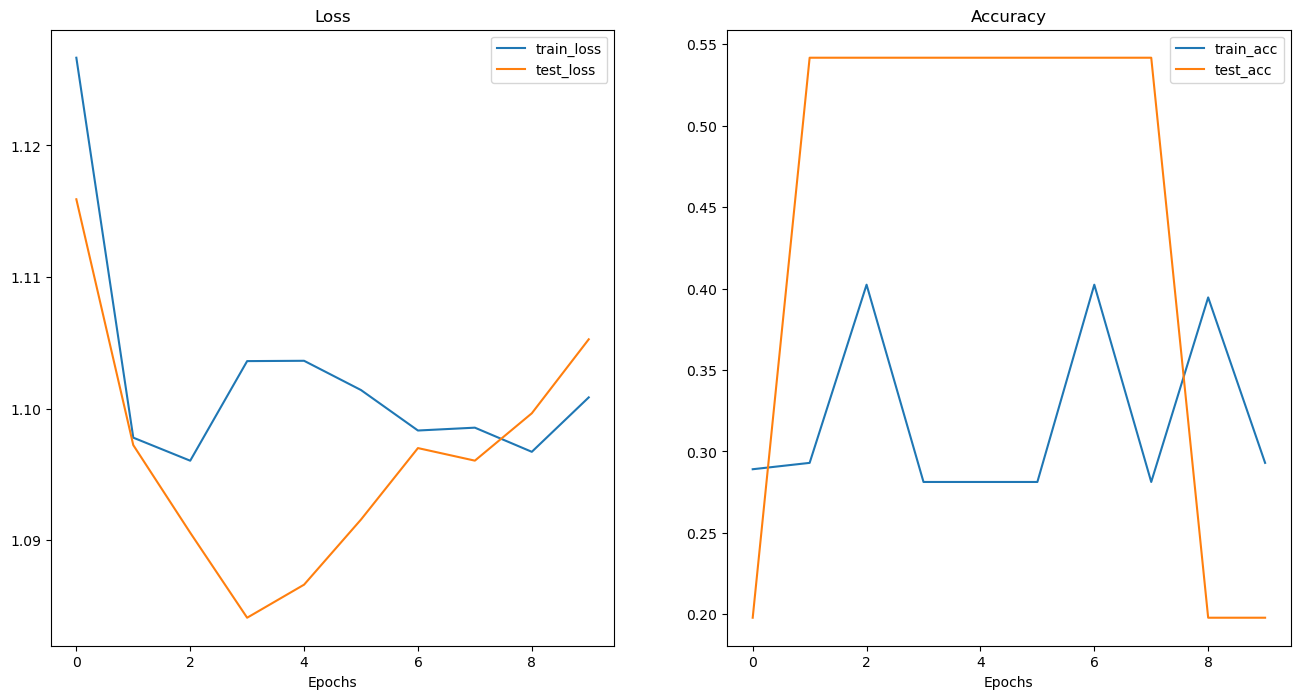

In [392]:
plot_loss_curves(model_0_results)

## 9. Create train and test `Dataset` and `DataLoaders` with data augmentation

In [401]:
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize(size = (64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins= 31),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size = (64, 64)),
    transforms.ToTensor()
])

In [402]:
# Turn Image folders into torch datasets
from torchvision import datasets
train_data_augmented = datasets.ImageFolder(root = training_path,
                                           transform = train_transform)

test_data_simple = datasets.ImageFolder(root = testing_path,
                                       transform = test_transform)

In [403]:
# Turn our datasets into DataLoaders
import os
from torch.utils.data import DataLoader

NUM_WORKERS = os.cpu_count()
BATCH_SIZE = 32

torch.manual_seed(95)

train_dataloader_augmented = DataLoader(dataset = train_data_augmented,
                                       batch_size=BATCH_SIZE,
                                       shuffle = True,
                                       num_workers=NUM_WORKERS)

test_data_simple = DataLoader(dataset = test_data_simple,
                             batch_size= BATCH_SIZE,
                             shuffle = False,
                             num_workers=NUM_WORKERS)

In [404]:
# Create model_1 from TinyVGG and send it to the target device
torch.manual_seed(95)
model_1 = TinyVGG(input_shape= 3, # number of color channels
                 hidden_units=10,
                 output_shape=len(class_names_found)).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [405]:
image, label = next(iter(train_dataloader_augmented))
image.shape

torch.Size([32, 3, 64, 64])

In [406]:
# Set the number of epochs
NUM_EPOCHS = 10

# Set up loss function and Optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                            lr = 0.01)

# Start the timer
from timeit import default_timer as timer

start_timer = timer()

model_1_results = train(model = model_1,
                       train_dataloader=train_dataloader_augmented,
                       test_dataloader=test_dataloader_simple,
                       epochs=NUM_EPOCHS,
                       loss_fn = loss_fn,
                       optimizer = optimizer,
                       device = device)

# End the timer
end_timer = timer()

# print the training time
print(f"Total training time: {end_timer - start_timer:.3f}sec")

on 0: Epoch -- 0   |   Train Loss -- 1.1407684087753296   |   Train Acc --  39.84375   |  Test Loss -- 1.0890895128250122  |  Test Acc --  54.166666666666664
on 1: Epoch -- 1   |   Train Loss -- 1.09384024143219   |   Train Acc --  40.234375   |  Test Loss -- 1.0828051567077637  |  Test Acc --  54.166666666666664
on 2: Epoch -- 2   |   Train Loss -- 1.1030426025390625   |   Train Acc --  28.125   |  Test Loss -- 1.07570219039917  |  Test Acc --  54.166666666666664
on 3: Epoch -- 3   |   Train Loss -- 1.1004056930541992   |   Train Acc --  28.125   |  Test Loss -- 1.0784112215042114  |  Test Acc --  54.166666666666664
on 4: Epoch -- 4   |   Train Loss -- 1.110939621925354   |   Train Acc --  28.125   |  Test Loss -- 1.0835415124893188  |  Test Acc --  54.166666666666664
on 5: Epoch -- 5   |   Train Loss -- 1.1066925525665283   |   Train Acc --  31.25   |  Test Loss -- 1.0910601615905762  |  Test Acc --  26.041666666666668
on 6: Epoch -- 6   |   Train Loss -- 1.1021144390106201   |   Tra

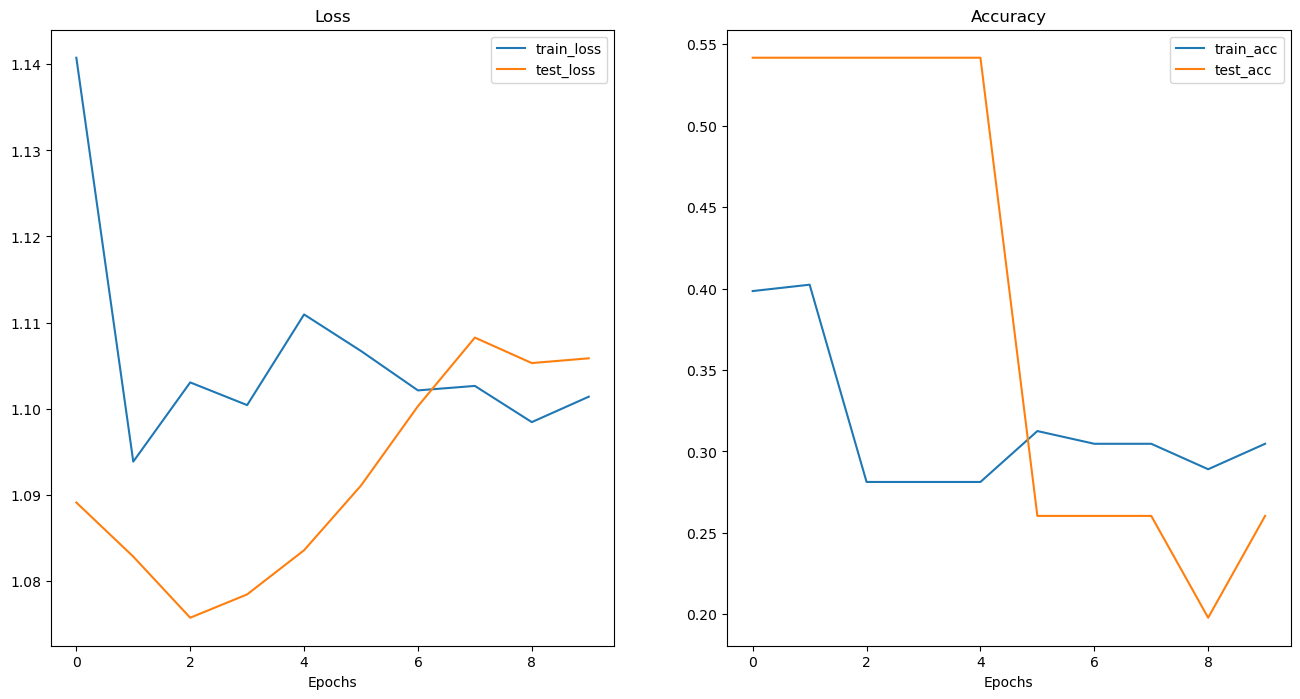

In [407]:
plot_loss_curves(model_1_results)

## Compare Model Results

There are few different ways to do it other than manually

1. Hard coding
2. Pytorch + Tensorboard
3. Weights & Biases
4. MLFlow

In [409]:
import pandas as pd

# Convert train_loss and test_loss to NumPy arrays
model_0_results['train_loss'] = np.array([t.item() for t in model_0_results['train_loss']])
model_0_results['test_loss'] = np.array([t.item() for t in model_0_results['test_loss']])

# Convert train_acc and test_acc to NumPy arrays
model_0_results['train_acc'] = np.array(model_0_results['train_acc'])
model_0_results['test_acc'] = np.array(model_0_results['test_acc'])

# Convert train_loss and test_loss to NumPy arrays
model_1_results['train_loss'] = np.array([t.item() for t in model_1_results['train_loss']])
model_1_results['test_loss'] = np.array([t.item() for t in model_1_results['test_loss']])

# Convert train_acc and test_acc to NumPy arrays
model_1_results['train_acc'] = np.array(model_1_results['train_acc'])
model_1_results['test_acc'] = np.array(model_1_results['test_acc'])


model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)

In [412]:
model_0_df

train_loss  train_acc  test_loss  test_acc
0    1.126669   0.289062   1.115910  0.197917
1    1.097790   0.292969   1.097225  0.541667
2    1.096038   0.402344   1.090567  0.541667
3    1.103609   0.281250   1.084103  0.541667
4    1.103633   0.281250   1.086616  0.541667
5    1.101409   0.281250   1.091566  0.541667
6    1.098333   0.402344   1.096998  0.541667
7    1.098550   0.281250   1.096043  0.541667
8    1.096714   0.394531   1.099642  0.197917
9    1.100851   0.292969   1.105266  0.197917

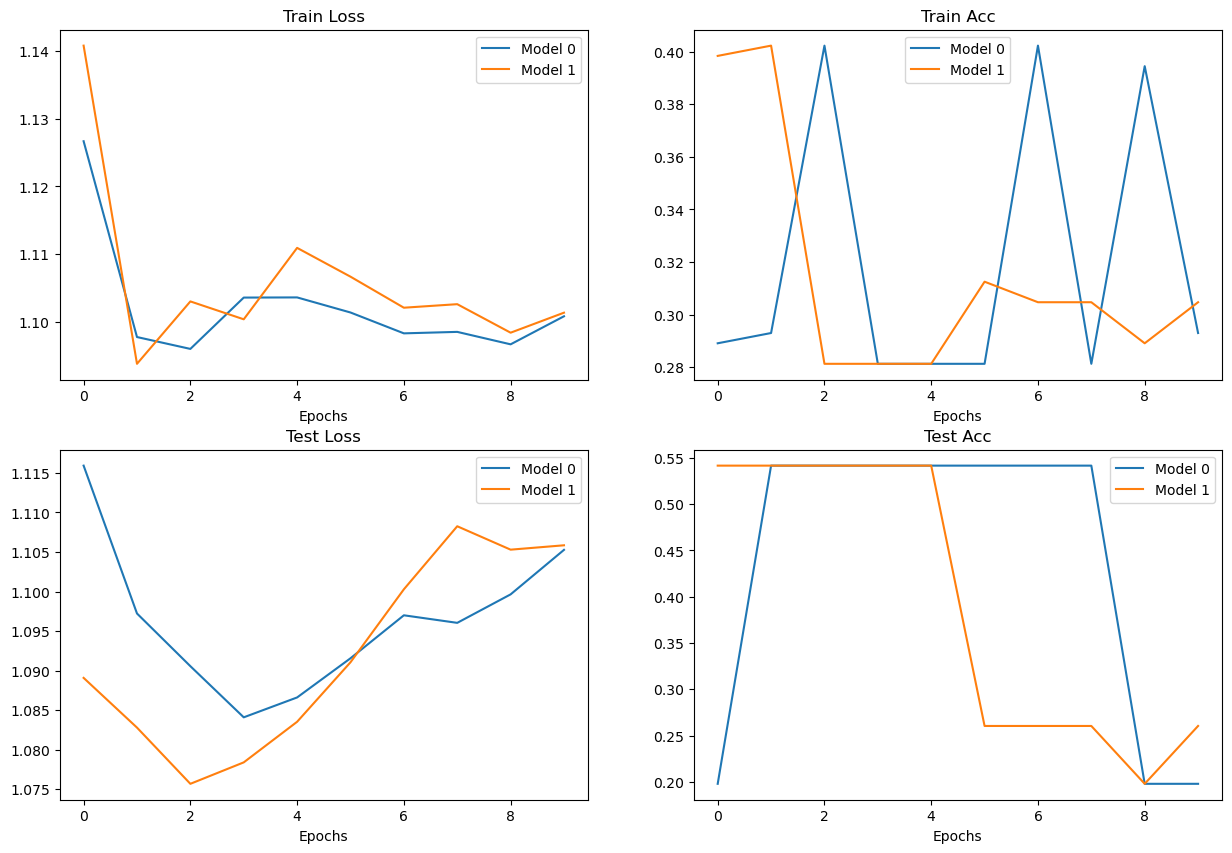

In [417]:
# setup plot
plt.figure(figsize = (15,10))

epochs = range(len(model_0_df))

# plot train loss of model_0 and model_1
plt.subplot(2,2,1)
plt.plot(epochs, model_0_df["train_loss"], label = "Model 0")
plt.plot(epochs, model_1_df["train_loss"], label = "Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

# plot train acc of model_0 and model_1
plt.subplot(2,2,2)
plt.plot(epochs, model_0_df["train_acc"], label = "Model 0")
plt.plot(epochs, model_1_df["train_acc"], label = "Model 1")
plt.title("Train Acc")
plt.xlabel("Epochs")
plt.legend()

# plot Test loss of model_0 and model_1
plt.subplot(2,2,3)
plt.plot(epochs, model_0_df["test_loss"], label = "Model 0")
plt.plot(epochs, model_1_df["test_loss"], label = "Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

# plot Test acc of model_0 and model_1
plt.subplot(2,2,4)
plt.plot(epochs, model_0_df["test_acc"], label = "Model 0")
plt.plot(epochs, model_1_df["test_acc"], label = "Model 1")
plt.title("Test Acc")
plt.xlabel("Epochs")
plt.legend();

# 11. Making predictions on Custom Food Images

In [419]:
# Setup custom image path
custom_image_path = "/Users/venu/Documents/Productivity/Pytorch Tutorials/data/pizza_steak_sushi/IMG_4406.JPG"

##### We cna read in custom images using - https://pytorch.org/vision/stable/generated/torchvision.io.read_image.html

## Loading in a custom image

After loading in the custom image, we have to make sure that the cusom image loaded is in the same format as the data we trained on - 

1. In tensor form with the datatype(float32)
2. of shape 64x64x3
3. On the right device

In [422]:
import torchvision
custom_image = torchvision.io.read_image(custom_image_path)

In [423]:
print(f"Custom image tensor: {custom_image}")
print(f"Custom image shape{custom_image.shape}")
print(f"Custom image data type {custom_image.dtype}")

Custom image tensor: tensor([[[ 46,  47,  46,  ...,  80,  85,  80],
         [ 47,  47,  45,  ...,  75,  77,  75],
         [ 47,  46,  44,  ...,  74,  76,  76],
         ...,
         [ 50,  49,  49,  ...,  77,  71,  75],
         [ 50,  50,  49,  ...,  76,  77,  74],
         [ 50,  49,  48,  ...,  75,  75,  81]],

        [[ 41,  42,  40,  ...,  90,  95,  90],
         [ 42,  42,  39,  ...,  85,  87,  85],
         [ 42,  41,  38,  ...,  84,  86,  86],
         ...,
         [ 51,  50,  50,  ...,  95,  89,  93],
         [ 51,  51,  50,  ...,  94,  95,  92],
         [ 51,  50,  49,  ...,  93,  93,  99]],

        [[ 22,  23,  24,  ...,  99, 104,  99],
         [ 23,  23,  23,  ...,  94,  96,  94],
         [ 23,  22,  22,  ...,  93,  95,  95],
         ...,
         [ 53,  52,  52,  ..., 109, 103, 107],
         [ 53,  53,  52,  ..., 108, 109, 106],
         [ 53,  52,  51,  ..., 107, 107, 113]]], dtype=torch.uint8)
Custom image shapetorch.Size([3, 3024, 4032])
Custom image data ty

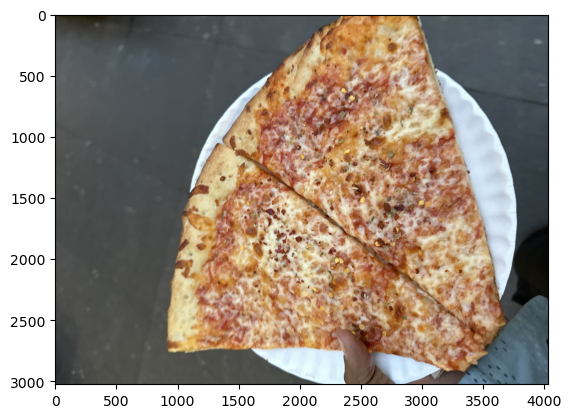

In [425]:
plt.imshow(custom_image.permute(1,2,0))

## Making predictions with custom image on the trained model

In [427]:
# try to make predictions with the custom image with unit8 format on the model_1
model_1.eval()
with torch.inference_mode():
    model_1(custom_image)
    # This will error because the model we trained is in format float32 and the image which we have is in format uint8

RuntimeError: Input type (unsigned char) and bias type (float) should be the same

In [429]:
# we can load in the custom image and convert into torch.float32 format and then try passing it into the model
custom_image = torchvision.io.read_image("/Users/venu/Documents/Productivity/Pytorch Tutorials/data/pizza_steak_sushi/IMG_4406.JPG").type(torch.float32)

In [430]:
custom_image

tensor([[[ 46.,  47.,  46.,  ...,  80.,  85.,  80.],
         [ 47.,  47.,  45.,  ...,  75.,  77.,  75.],
         [ 47.,  46.,  44.,  ...,  74.,  76.,  76.],
         ...,
         [ 50.,  49.,  49.,  ...,  77.,  71.,  75.],
         [ 50.,  50.,  49.,  ...,  76.,  77.,  74.],
         [ 50.,  49.,  48.,  ...,  75.,  75.,  81.]],

        [[ 41.,  42.,  40.,  ...,  90.,  95.,  90.],
         [ 42.,  42.,  39.,  ...,  85.,  87.,  85.],
         [ 42.,  41.,  38.,  ...,  84.,  86.,  86.],
         ...,
         [ 51.,  50.,  50.,  ...,  95.,  89.,  93.],
         [ 51.,  51.,  50.,  ...,  94.,  95.,  92.],
         [ 51.,  50.,  49.,  ...,  93.,  93.,  99.]],

        [[ 22.,  23.,  24.,  ...,  99., 104.,  99.],
         [ 23.,  23.,  23.,  ...,  94.,  96.,  94.],
         [ 23.,  22.,  22.,  ...,  93.,  95.,  95.],
         ...,
         [ 53.,  52.,  52.,  ..., 109., 103., 107.],
         [ 53.,  53.,  52.,  ..., 108., 109., 106.],
         [ 53.,  52.,  51.,  ..., 107., 107., 113.]]]

In [432]:
# Now the image is in float 32 format
model_1.eval()
with torch.inference_mode():
    model_1(custom_image)
    # even though we converted the dtype of our image into float32, our image is not in the same shape of what our model is expecting

RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x762048 and 2560x3)

In [433]:
custom_image.shape

torch.Size([3, 3024, 4032])

In [434]:
image.shape

torch.Size([32, 3, 64, 64])

In [435]:
# We also need to normalize the values of our image tensor between 0 and 1 like it is for our images

In [436]:
image

tensor([[[[0.9451, 0.9451, 0.9373,  ..., 0.7529, 0.7333, 0.7255],
          [0.9373, 0.9490, 0.9451,  ..., 0.7412, 0.7333, 0.7333],
          [0.9569, 0.9529, 0.9451,  ..., 0.7490, 0.7490, 0.7490],
          ...,
          [0.9137, 0.9216, 0.9255,  ..., 0.9373, 0.9333, 0.9294],
          [0.9216, 0.9216, 0.9255,  ..., 0.9451, 0.9373, 0.9294],
          [0.9176, 0.9176, 0.9216,  ..., 0.9373, 0.9294, 0.9333]],

         [[0.7843, 0.7843, 0.7804,  ..., 0.5373, 0.5333, 0.5294],
          [0.7804, 0.7843, 0.7882,  ..., 0.5216, 0.5294, 0.5294],
          [0.7843, 0.7843, 0.7843,  ..., 0.5216, 0.5412, 0.5412],
          ...,
          [0.7294, 0.7294, 0.7333,  ..., 0.7490, 0.7529, 0.7490],
          [0.7294, 0.7294, 0.7294,  ..., 0.7569, 0.7569, 0.7569],
          [0.7294, 0.7412, 0.7294,  ..., 0.7647, 0.7608, 0.7569]],

         [[0.6039, 0.5961, 0.5961,  ..., 0.3490, 0.3412, 0.3176],
          [0.5922, 0.5922, 0.6000,  ..., 0.3412, 0.3373, 0.3216],
          [0.5961, 0.5922, 0.5922,  ..., 0

In [437]:
# we divide the custom image with 255, as we store the tensor values from 0 to 255 in torch vision.
# The values of the output tensor are uint8 in [0, 255].

In [438]:
custom_image = torchvision.io.read_image("/Users/venu/Documents/Productivity/Pytorch Tutorials/data/pizza_steak_sushi/IMG_4406.JPG").type(torch.float32)/ 255

In [439]:
custom_image

tensor([[[0.1804, 0.1843, 0.1804,  ..., 0.3137, 0.3333, 0.3137],
         [0.1843, 0.1843, 0.1765,  ..., 0.2941, 0.3020, 0.2941],
         [0.1843, 0.1804, 0.1725,  ..., 0.2902, 0.2980, 0.2980],
         ...,
         [0.1961, 0.1922, 0.1922,  ..., 0.3020, 0.2784, 0.2941],
         [0.1961, 0.1961, 0.1922,  ..., 0.2980, 0.3020, 0.2902],
         [0.1961, 0.1922, 0.1882,  ..., 0.2941, 0.2941, 0.3176]],

        [[0.1608, 0.1647, 0.1569,  ..., 0.3529, 0.3725, 0.3529],
         [0.1647, 0.1647, 0.1529,  ..., 0.3333, 0.3412, 0.3333],
         [0.1647, 0.1608, 0.1490,  ..., 0.3294, 0.3373, 0.3373],
         ...,
         [0.2000, 0.1961, 0.1961,  ..., 0.3725, 0.3490, 0.3647],
         [0.2000, 0.2000, 0.1961,  ..., 0.3686, 0.3725, 0.3608],
         [0.2000, 0.1961, 0.1922,  ..., 0.3647, 0.3647, 0.3882]],

        [[0.0863, 0.0902, 0.0941,  ..., 0.3882, 0.4078, 0.3882],
         [0.0902, 0.0902, 0.0902,  ..., 0.3686, 0.3765, 0.3686],
         [0.0902, 0.0863, 0.0863,  ..., 0.3647, 0.3725, 0.

In [441]:
custom_image.shape, image.shape
# still we need to change the shape of our custom image


(torch.Size([3, 3024, 4032]), torch.Size([32, 3, 64, 64]))

In [442]:
# Create transform pipeline to resize the image
from torchvision import transforms
custom_image_pipeline = transforms.Compose([transforms.Resize(size = (64, 64))])

custom_image_transformed = custom_image_pipeline(custom_image)

In [444]:
custom_image_transformed.shape

torch.Size([3, 64, 64])

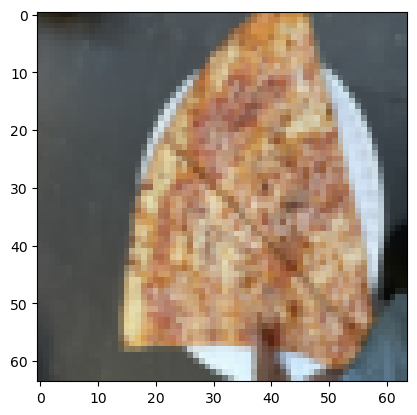

In [445]:
plt.imshow(custom_image_transformed.permute(1,2,0))

In [447]:
model_1.eval()
with torch.inference_mode():
    model_1(custom_image_transformed)
    # This will fail becaue we have not yet added the batch size to the tensor

RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x256 and 2560x3)

In [448]:
custom_image_transformed.unsqueeze(0).shape

torch.Size([1, 3, 64, 64])

In [450]:
model_1.eval()
with torch.inference_mode():
    custom_image_preds = model_1(custom_image_transformed.unsqueeze(0))

In [451]:
custom_image_preds

tensor([[ 0.0035, -0.0042, -0.0355]])

In [452]:
class_names_found

['pizza', 'steak', 'sushi']

## To make predictions on the custom image we had to - 

1. Load the image and turn into a tensor
2. Make sure the image is in the same datatype of the images the model is trained on
3. Make sure the image is on the same shape of the trained images which is (3,64,64) with a batch size (1, 3, 64, 64)
4. Make sure the image is on the same device

In [453]:
# convert the pred_logits into pred probs
custom_image_probs = custom_image_preds.softmax(dim= 1)
custom_image_probs

tensor([[0.3385, 0.3359, 0.3256]])

In [456]:
custom_image_pred_label = custom_image_probs.argmax(dim = 1).cpu()
custom_image_pred_label

tensor([0])

### 11 Putting custom image prediction together: building a function

Expected outcome - 
A function when we pass an image path, it shold make all the shape corrections and pass the image to model and predict on the image and plot the image + prediction

In [476]:
def custom_image_prediction(image_path: str,
                           model:torch.nn.Module,
                           transform = None,
                           device = device,
                           class_names = None):
    custom_image = torchvision.io.read_image(image_path).type(torch.float32)/ 255 #(we are dividing to get the tensor values between 0 and 1)

    if transform:
        
        # transform the image shape 
        custom_image_transformed = transform(custom_image)

    # make sure the model is on the target device
    model.to(device)

    # add batch dimension by unsqueezing the custom image transformed
    custom_image_batch_transformed = custom_image_transformed.unsqueeze(0)

    # pass the image through the model for prediction
    model.eval()
    with torch.inference_mode():
        custom_image_pred_logits = model(custom_image_batch_transformed.to(device))

    # convert the logits into prediction logits and then into pred probs
    custom_image_pred_probs = torch.softmax(custom_image_pred_logits, dim = 1)

    # convert the logits into prediction probs and then into pred labels
    custom_image_pred_labels = torch.argmax(custom_image_pred_probs, dim = 1)

    # print the predicted class
    predicted_class = class_names_found[custom_image_pred_labels.item()]

    print(f"The predicted class of the custom image is: {predicted_class}")
    
    plt.imshow(custom_image_batch_transformed.squeeze().permute(1,2,0)) # remove the extra batch dimension and rearrange shape to HWC
    if class_names:
        title = f"Pred Label : {class_names[custom_image_pred_labels.item()]}  |  Prob  :   {custom_image_pred_probs.max().cpu():.3f}"

    else:
        title = f"Pred Label  :  {custom_image_pred_labels}  |   Prob  :  {custom_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False)

The predicted class of the custom image is: pizza


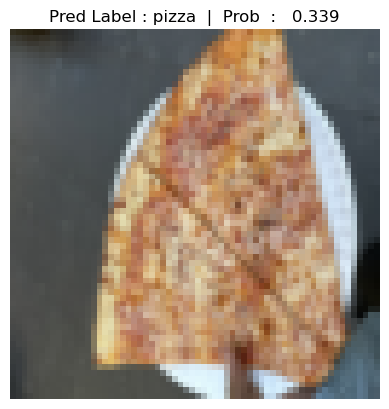

In [481]:
custom_image_prediction("/Users/venu/Documents/Productivity/Pytorch Tutorials/data/pizza_steak_sushi/IMG_4406.JPG",
                       model = model_1,
                       transform = custom_image_pipeline,
                       device = device,
                       class_names=class_names_found)